#### **Evaluating GAN**

Firstly, let us inspect the images generated by the **Generator**

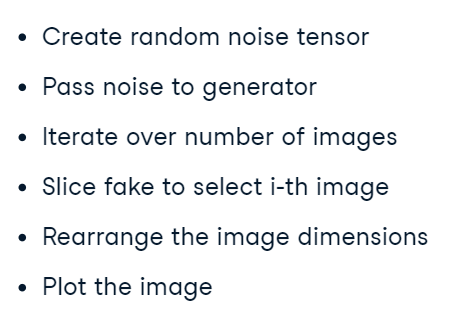

In [ ]:
num_images_to_generate = 9
noise = torch.randn(num_images_to_generate, 16)
with torch.no_grad():
    fake = gen(noise)

print(f'Generated Shape: {fake.shape}')

Sample Output -

`Generated shape: torch.Size([9, 3, 96, 96])`

In [ ]:
for i in range(num_images_to_generate):
    image_tensor = fake[i, :, :, :]
    image_permuted = image_tensor.permute(1, 2, 0)
    plt.imshow(image_permuted)
    plt.show()

#### **Evaluation metric for GAN - Fréchet Inception Distance (FID)**


- Inception is a popular image classification model. 
- Frechet distance is the distance measured between two probability distribution

Fréchet Inception Distance (FID) - 
-  It uses inception to extract features from both real and fake image samples.
-  Calculate means and covariances of the features for real and fake images.
-  Calculate Fréchet distance between the real and the fake normal distributions.

Low FID means fakes are similar to the training data and diverse. \
FID < 10 is good.

#### **FID in PyTorch**

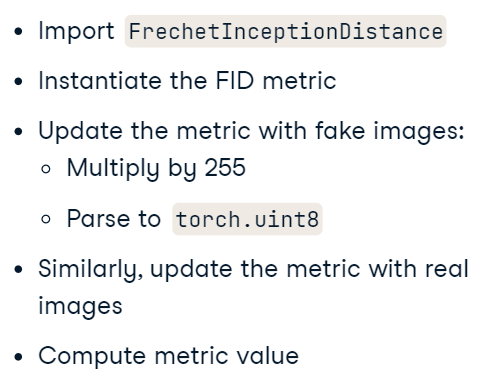

In [ ]:
import torch 
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(feature=64)

# for Fake images
fid.update((fake*255).to(torch.unit8), real=False)

# for Real images
fid.update((fake*255).to(torch.unit8), real=True)

fid.compute()

Sample Output -

`tensor(7.5159)`